In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt#for displaying the plots visualization
import seaborn as sns#display visualiation 

In [8]:
df=pd.read_csv('Balance_scale.csv',names=['class','L-weight','L-distance','R-weight','R-Distance'],index_col = False)
df.head()

,class,L-weight,L-distance,R-weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [9]:
df.isnull().sum()

class         0
L-weight      0
L-distance    0
R-weight      0
R-Distance    0
dtype: int64

In [11]:
df.shape

(625, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
class         625 non-null object
L-weight      625 non-null int64
L-distance    625 non-null int64
R-weight      625 non-null int64
R-Distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [13]:
df.tail()

,class,L-weight,L-distance,R-weight,R-Distance
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4
624,B,5,5,5,5


In [14]:
df.describe()

,L-weight,L-distance,R-weight,R-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


Here the class is string so we need to convert through Label encoder 

In [18]:
from sklearn.preprocessing import LabelEncoder
df['class']=LabelEncoder().fit_transform(df['class'].tolist())


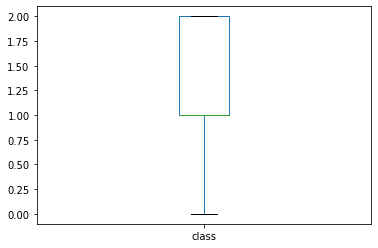

In [19]:
df['class'].plot.box()#Box plots is used to finding outliers.

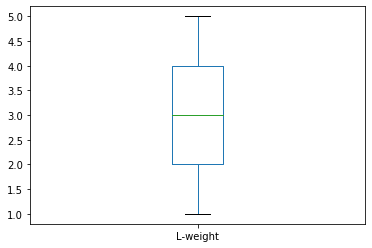

In [20]:
df['L-weight'].plot.box()

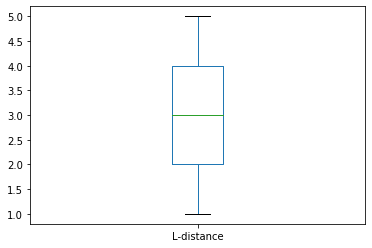

In [21]:
df['L-distance'].plot.box()

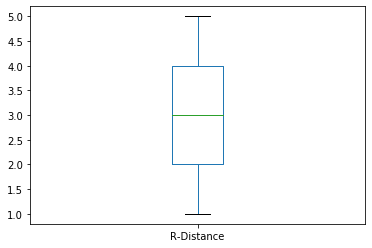

In [23]:
df['R-Distance'].plot.box()

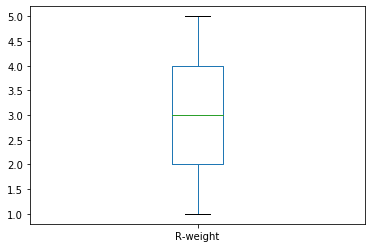

In [24]:
df['R-weight'].plot.box()

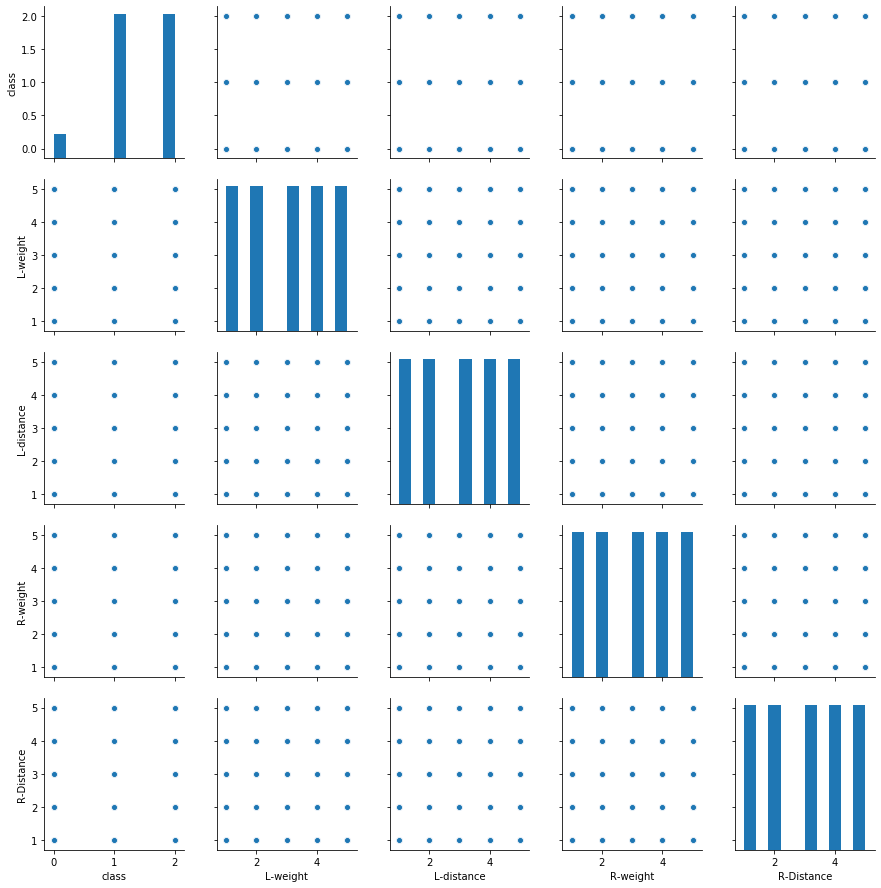

In [25]:
sns.pairplot(df)

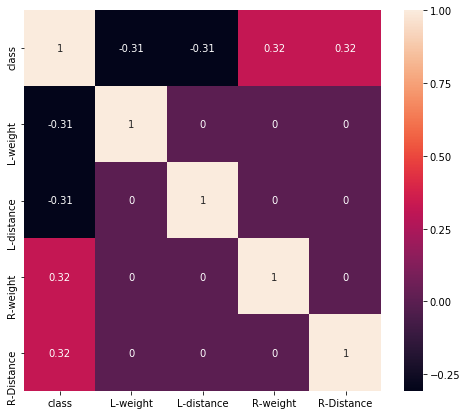

In [26]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

form above corelation we can see that no need to use class atributes because our objective is to balance R and L weight.

In [35]:
x=df.iloc[:,1:]#input parameters
x.head()

,L-weight,L-distance,R-weight,R-Distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [36]:
y=df.iloc[:,0]# this is the output variables i.e torque
y.head()

0    0
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [37]:
print(x.shape)
print(y.shape)

(625, 4)
(625,)


In [44]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score



In [45]:
#Training and test  the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=47)

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.86
[[  0  13   7]
 [  0 100   8]
 [  0   7 115]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.83      0.93      0.88       108
           2       0.88      0.94      0.91       122

    accuracy                           0.86       250
   macro avg       0.57      0.62      0.60       250
weighted avg       0.79      0.86      0.82       250



In [47]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))

print(classification_report(y_test,predrf))

0.796
[[  0  13   7]
 [  4  98   6]
 [ 11  10 101]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.81      0.91      0.86       108
           2       0.89      0.83      0.86       122

    accuracy                           0.80       250
   macro avg       0.57      0.58      0.57       250
weighted avg       0.78      0.80      0.79       250



In [48]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.776
[[ 5  8  7]
 [11 90  7]
 [19  4 99]]
              precision    recall  f1-score   support

           0       0.14      0.25      0.18        20
           1       0.88      0.83      0.86       108
           2       0.88      0.81      0.84       122

    accuracy                           0.78       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.82      0.78      0.80       250



In [49]:
from sklearn.ensemble import AdaBoostClassifier
adb= AdaBoostClassifier()
adb.fit(x_train,y_train)
adb.score(x_train,y_train)
predadb=rf.predict(x_test)
print(accuracy_score(y_test,predadb))
print(confusion_matrix(y_test,predadb))

print(classification_report(y_test,predadb))

0.796
[[  0  13   7]
 [  4  98   6]
 [ 11  10 101]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.81      0.91      0.86       108
           2       0.89      0.83      0.86       122

    accuracy                           0.80       250
   macro avg       0.57      0.58      0.57       250
weighted avg       0.78      0.80      0.79       250



In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=dt.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))

print(classification_report(y_test,predgbc))

0.776
[[ 5  8  7]
 [11 90  7]
 [19  4 99]]
              precision    recall  f1-score   support

           0       0.14      0.25      0.18        20
           1       0.88      0.83      0.86       108
           2       0.88      0.81      0.84       122

    accuracy                           0.78       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.82      0.78      0.80       250



In [51]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.888
[[  0  16   4]
 [  0 103   5]
 [  0   3 119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.84      0.95      0.90       108
           2       0.93      0.98      0.95       122

    accuracy                           0.89       250
   macro avg       0.59      0.64      0.62       250
weighted avg       0.82      0.89      0.85       250



In [52]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.884
[[  0  14   6]
 [  0 106   2]
 [  0   7 115]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.83      0.98      0.90       108
           2       0.93      0.94      0.94       122

    accuracy                           0.88       250
   macro avg       0.59      0.64      0.61       250
weighted avg       0.82      0.88      0.85       250



In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.808
[[ 5 12  3]
 [ 4 99  5]
 [11 13 98]]
              precision    recall  f1-score   support

           0       0.25      0.25      0.25        20
           1       0.80      0.92      0.85       108
           2       0.92      0.80      0.86       122

    accuracy                           0.81       250
   macro avg       0.66      0.66      0.65       250
weighted avg       0.82      0.81      0.81       250



Conclusion -We are getting following accuracy score after applying different Algorithm

Logistic Regression-86%
DecisionTree Classifier-78%
Support Vector Classifier-89
GaussianNBClassifier-   88&
KNN Classifier-       80%
GradientBoosterClassifier-76
AdaBoostClassifier-79
RandomForestClassifier-76


Now from applying all the we are getting maximum accuracy score is 89 from Support Vector Classifier

Lets try with standard Algorithm GradientSearchCV

In [59]:
svc=SVC()
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters=[{'C':[1,10,100],'kernel':['linear']},
            {'C':[1,10,100],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [62]:
accuracy=grid_search.best_score_
accuracy

0.96

So GradientSearCV is the best Algorithm to get 96% Accuracy Score